- Importing the necesssary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [21]:
# Loading the dataset
df = pd.read_csv("Assignment2-Dataset.csv")
df

,Unnamed: 0,Hour,Heart_Rate_bpm,SpO2_Percent,MAP_mmHg,Pain_Scale,IV_Fluid_ml
0,2023-01-01 00:00:00,0,75.000000,97.308600,90.000000,4,500
1,2023-01-01 01:00:00,1,76.490142,98.463089,91.145166,5,0
2,2023-01-01 02:00:00,2,75.628307,98.954708,93.371294,5,0
3,2023-01-01 03:00:00,3,77.382880,97.300716,93.534914,5,0
4,2023-01-01 04:00:00,4,81.237106,98.281485,91.886718,4,0
...,...,...,...,...,...,...,...
495,2023-01-21 15:00:00,495,79.784208,97.499190,92.190547,4,0
496,2023-01-21 16:00:00,496,79.965676,97.859450,94.179493,4,0
497,2023-01-21 17:00:00,497,75.364235,98.898843,96.101932,4,0
498,2023-01-21 18:00:00,498,74.683948,98.320421,97.173973,5,0


In [22]:
# Renaming the Unnamed Column to Time
df.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)

# Converting to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Setting it as the index
df.set_index('Time', inplace=True)
df.head()

,Hour,Heart_Rate_bpm,SpO2_Percent,MAP_mmHg,Pain_Scale,IV_Fluid_ml
Time,,,,,,
2023-01-01 00:00:00,0,75.000000,97.308600,90.000000,4,500
2023-01-01 01:00:00,1,76.490142,98.463089,91.145166,5,0
2023-01-01 02:00:00,2,75.628307,98.954708,93.371294,5,0
2023-01-01 03:00:00,3,77.382880,97.300716,93.534914,5,0
2023-01-01 04:00:00,4,81.237106,98.281485,91.886718,4,0


## Multivariate Analysis

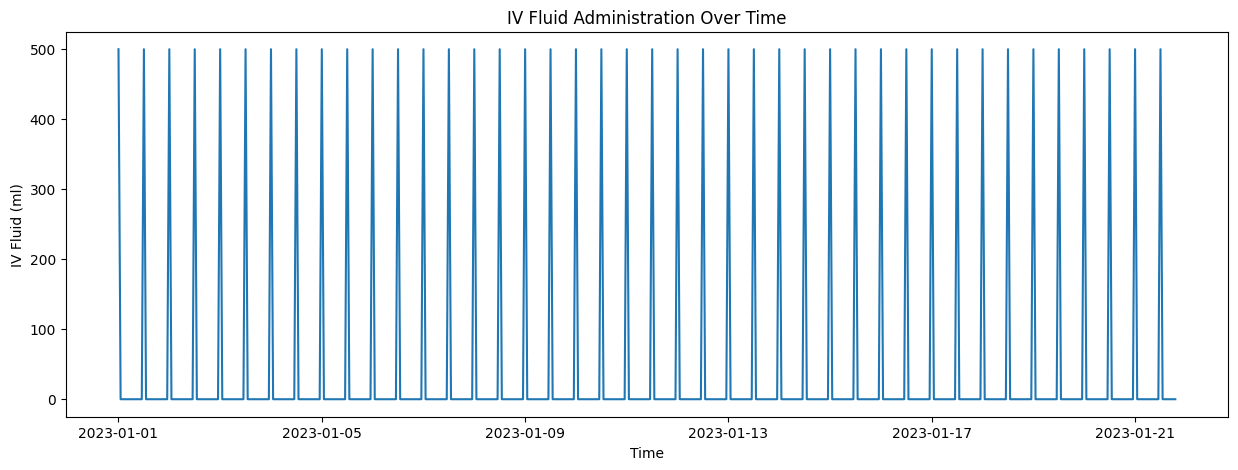

In [29]:
# IV Fluid over time plot
plt.figure(figsize=(15,5))
plt.plot(df.index, df['IV_Fluid_ml'])
plt.title("IV Fluid Administration Over Time")
plt.xlabel("Time")
plt.ylabel("IV Fluid (ml)")
plt.show()

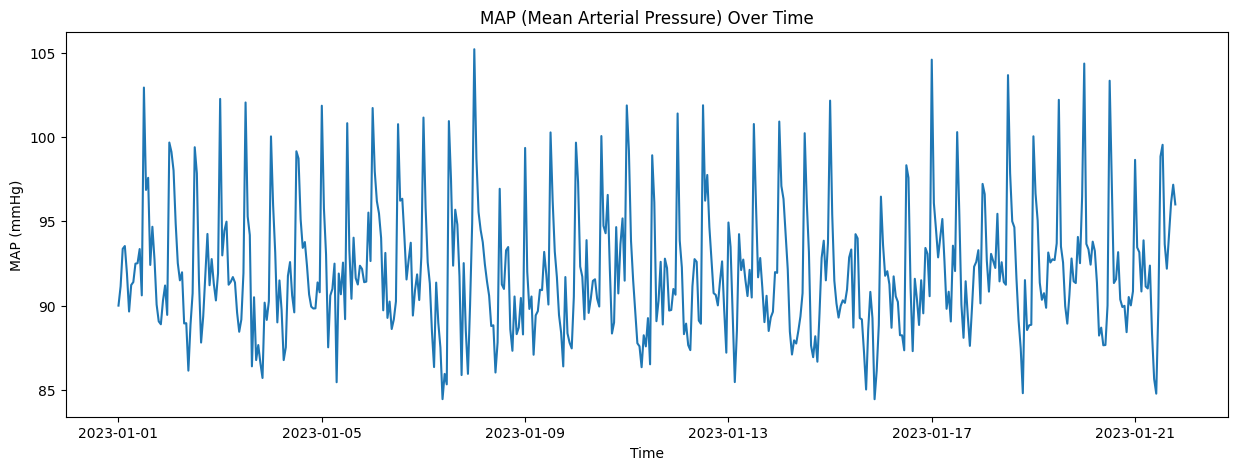

In [ ]:
# MAP over time plot
plt.figure(figsize=(15,5))
plt.plot(df.index, df['MAP_mmHg'])
plt.title("MAP (Mean Arterial Pressure) Over Time")
plt.xlabel("Time")
plt.ylabel("MAP (mmHg)")
plt.show()

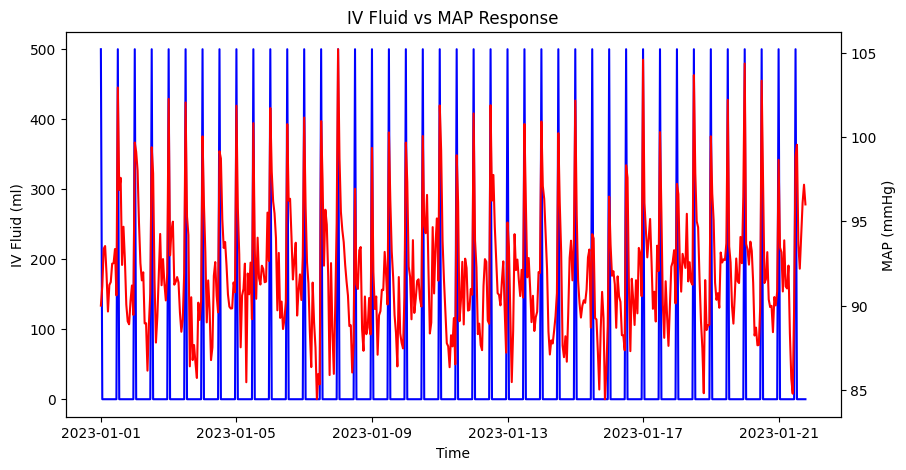

In [30]:
fig, ax1 = plt.subplots(figsize=(10,5))

# First Y-axis (IV Fluid)
ax1.plot(df.index, df['IV_Fluid_ml'], color='blue')
ax1.set_ylabel("IV Fluid (ml)")
ax1.set_xlabel("Time")

# Second Y-axis (MAP)
ax2 = ax1.twinx()
ax2.plot(df.index, df['MAP_mmHg'], color='red')
ax2.set_ylabel("MAP (mmHg)")

plt.title("IV Fluid vs MAP Response")
plt.show()

- I first plotted IV_Fluid_ml and MAP_mmHg separately to understand how each variable behaves over time.
- The IV fluid plot shows clear spikes representing fluid administration, while the MAP plot shows fluctuations in blood pressure levels. Plotting them individually helps to clearly observe their patterns without distortion and provides a foundation for comparing how MAP responds after fluid boluses.

## SpO2 Component Identification

- The SpO2_Percent variable mainly represents a residual component in time series decomposition because the values fluctuate slightly around a normal range (about 95–100%) without showing a consistent upward or downward movement thus not displaying a clear trend.
- Since the data is recorded at 12-hour intervals, there is no strong repeating cyclical pattern to indicate seasonality which makes the irregular variations observed in SpO2 best classified as residual (random noise).

## Moving Average

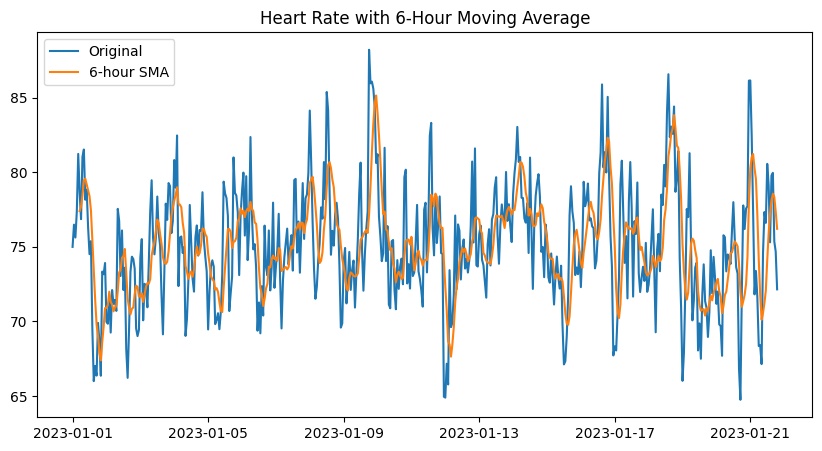

In [31]:
df['HR_SMA_6'] = df['Heart_Rate_bpm'].rolling(window=6).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Heart_Rate_bpm'], label='Original')
plt.plot(df['HR_SMA_6'], label='6-hour SMA')
plt.legend()
plt.title("Heart Rate with 6-Hour Moving Average")
plt.show()

- The 6 hour Simple Moving Average (SMA) is calculated by taking the average of the current heart rate value and the previous five values. This can be got by a formula of SMA(t) = X(t) + X(t-1) + X(t-2) + X(t-3) + X(t-4) + X(t-5) divied by 6

- This process smooths out short-term fluctuations(noise) in the Heart_Rate_bpm data, making the overall pattern easier to observe.

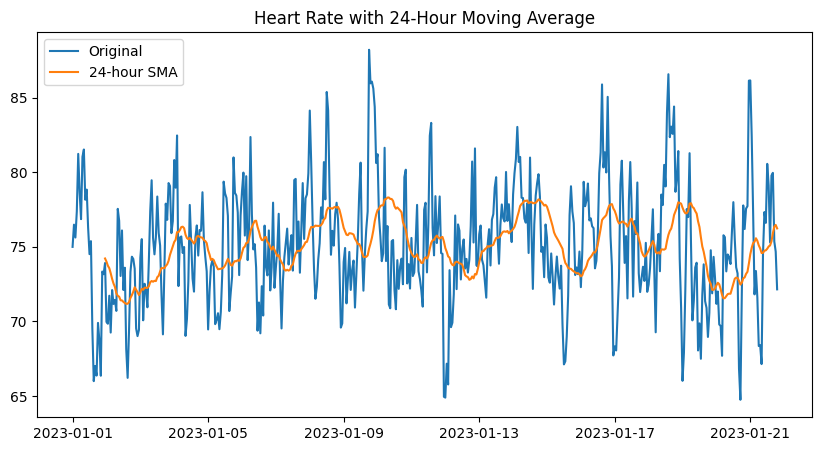

In [34]:
df['HR_SMA_24'] = df['Heart_Rate_bpm'].rolling(window=24).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Heart_Rate_bpm'], label='Original')
plt.plot(df['HR_SMA_24'], label='24-hour SMA')
plt.legend()
plt.title("Heart Rate with 24-Hour Moving Average")
plt.show()

- Increasing the window size from 6 hours to 24 hours makes the resulting line more smoother beacuse more values are averaged together. However, a larger window also increases lag thus meaning the moving average reacts more slowly to sudden changes in the heart rate

## Clinical Interpretation of Variance

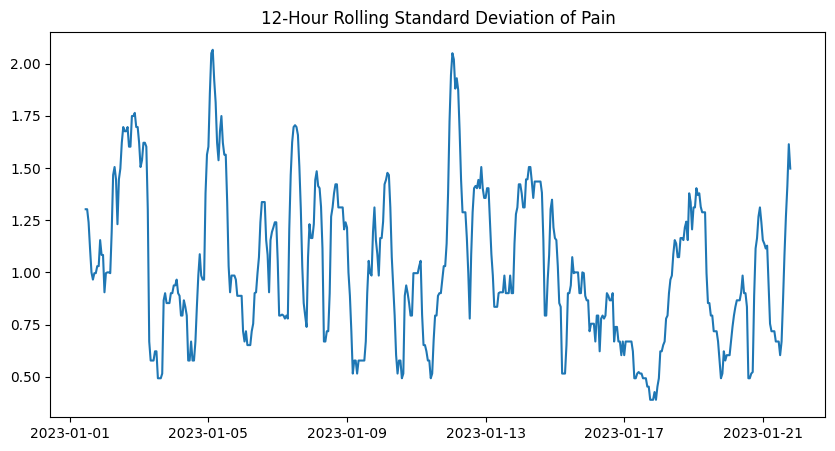

In [35]:
df['Pain_STD_12'] = df['Pain_Scale'].rolling(window=12).std()

plt.figure(figsize=(10,5))
plt.plot(df['Pain_STD_12'])
plt.title("12-Hour Rolling Standard Deviation of Pain")
plt.show()

- A 12-hour rolling standard deviation measures how much the Pain_Scale values vary within each 12-hour window.

- A sharp spike in the rolling standard deviation means the patient’s pain levels are changing rapidly within that period thus indicating instability or possible worsening of the patient’s condition.

- On the other hand, if the rolling standard deviation is close to zero, it means the pain levels are consistent and stable over time. This suggests the patient’s condition is steady with little variation in pain intensity.

## ADF Test

In [ ]:
result = adfuller(df['MAP_mmHg'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -6.064866087253282
p-value: 1.1884419553794383e-07


## Differencing

In [40]:
df['MAP_diff'] = df['MAP_mmHg'].diff()
df[['MAP_mmHg', 'MAP_diff']].head()

,MAP_mmHg,MAP_diff
Time,,
2023-01-01 00:00:00,90.000000,NaN
2023-01-01 01:00:00,91.145166,1.145166
2023-01-01 02:00:00,93.371294,2.226128
2023-01-01 03:00:00,93.534914,0.163621
2023-01-01 04:00:00,91.886718,-1.648196
